  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

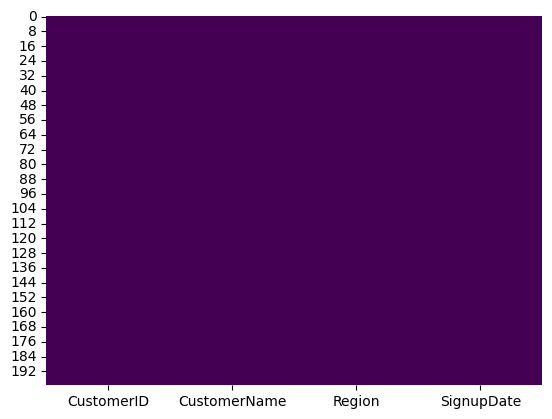

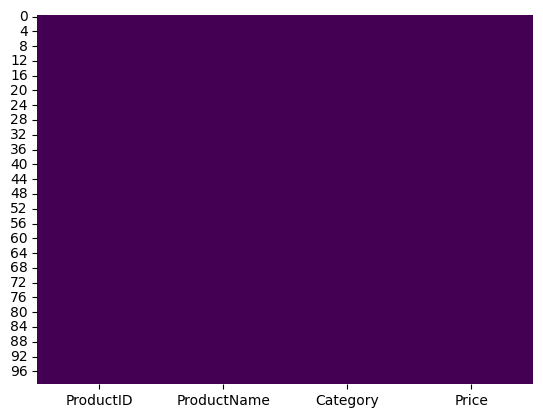

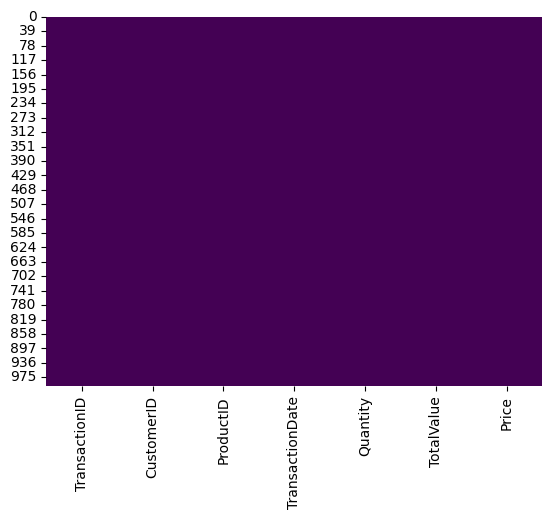

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Average Transaction Value: 689.9955600000001
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
  CustomerID  TotalValue
0      C0001     3354.52
1      C0002     1862.74
2      C0003     2725.38
3      C0004     5354.88
4      C0005     2034.24
          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


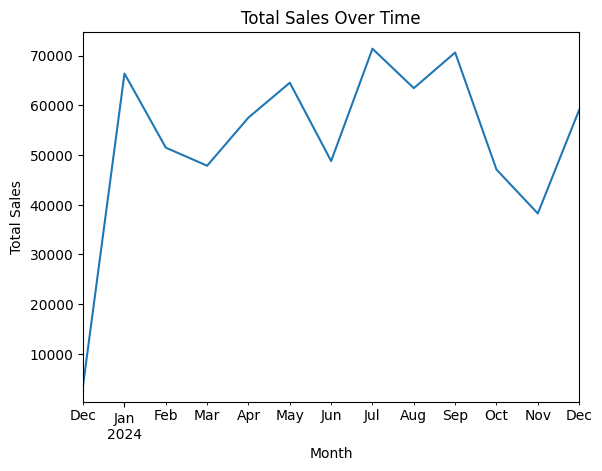

   ProductID  Quantity            ProductName
53      P054        46     SoundWave Cookbook
58      P059        46        SoundWave Jeans
28      P029        45     TechPro Headphones
47      P048        43       TechPro Cookbook
56      P057        43  ActiveWear Smartphone


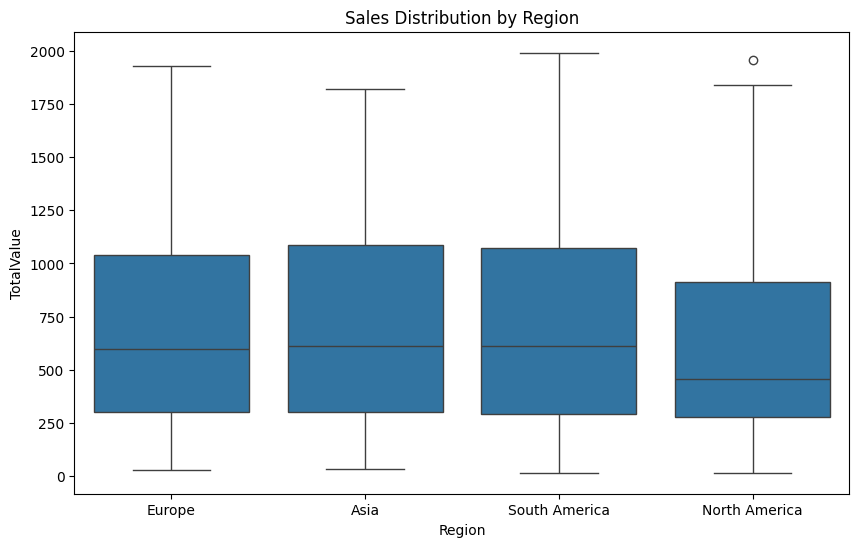

   ProductID  Quantity            ProductName
53      P054        46     SoundWave Cookbook
58      P059        46        SoundWave Jeans
28      P029        45     TechPro Headphones
47      P048        43       TechPro Cookbook
56      P057        43  ActiveWear Smartphone


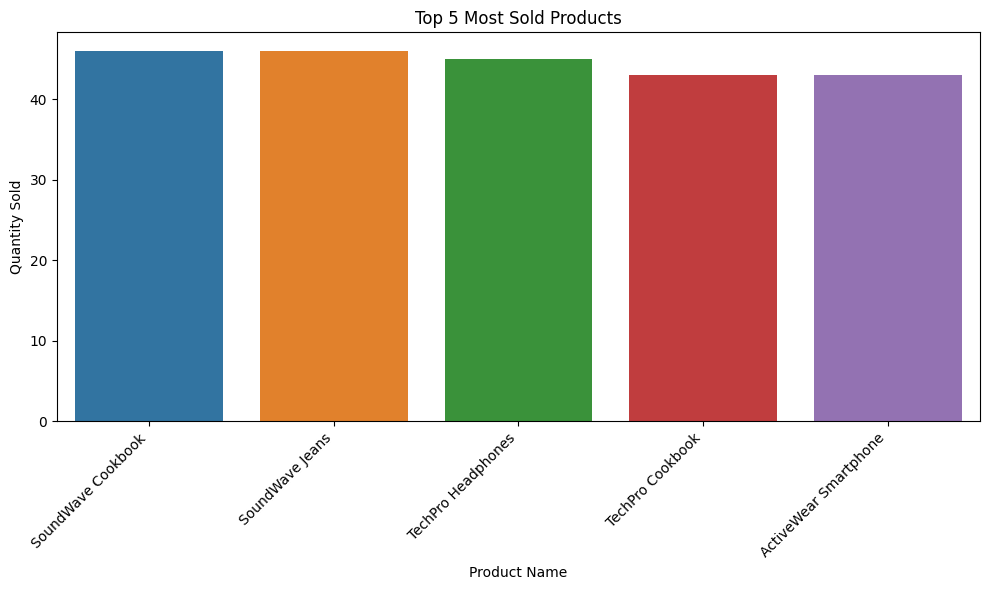

Average Sales per Customer: 3467.314371859297


In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Loading dta sheets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Checking first Rows to understand data
print(customers.head())
print(products.head())
print(transactions.head())
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check data types of each column
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)

# Get summary statistics for numerical data
print(customers.describe())
print(products.describe())
print(transactions.describe())
# Visualize missing data
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.show()
sns.heatmap(products.isnull(), cbar=False, cmap='viridis')
plt.show()
sns.heatmap(transactions.isnull(), cbar=False, cmap='viridis')
plt.show()
#  Top 5 Regions -  Most Customers
region_counts = customers['Region'].value_counts().head(5)
print(region_counts)

# Average Transaction Value
avg_transaction_value = transactions['TotalValue'].mean()
print(f'Average Transaction Value: {avg_transaction_value}')

# Most Popular Product Categories
category_counts = products['Category'].value_counts().head(5)
print(category_counts)

# Total Sales per Customer
customer_sales = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
print(customer_sales.head())

# Transactions by Region
region_sales = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
region_sales = region_sales.groupby('Region')['TotalValue'].sum().reset_index()
print(region_sales)
# Transactions over time (Monthly sales)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

#  Top 5 most sold products
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products[['ProductID', 'ProductName']], on='ProductID')
top_products = product_sales.nlargest(5, 'Quantity')
print(top_products)

# Sales distribution by region
region_sales = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_sales, x='Region', y='TotalValue')
plt.title('Sales Distribution by Region')
plt.show()
# 2. Top 5 most sold products
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products[['ProductID', 'ProductName']], on='ProductID')
top_products = product_sales.nlargest(5, 'Quantity')

# Print the top 5 most sold products
print(top_products)

# Plot the top 5 most sold products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', hue='ProductName', legend=False)
plt.title('Top 5 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate product names for better readability
plt.tight_layout()
plt.show()
#total sales across all customers
total_sales = customer_sales['TotalValue'].sum()

#number of unique customers
num_customers = customer_sales['CustomerID'].nunique()

# average sales per customer
average_sales_per_customer = total_sales / num_customers

print(f'Average Sales per Customer: {average_sales_per_customer}')